<img src="logo.jpg" />

## [Prof. Pedram Jahangiry](https://huntsman.usu.edu/directory/jahangiry-pedram) 
[GitHub account](https://github.com/PJalgotrader) 

[YouTube Channel](https://www.youtube.com/channel/UCNDElcuuyX-2pSatVBDpJJQ/playlists) 

# Unsupervised Learning: Principle Component Analysis (PCA) 

## Using pca package
pca is a python package to perform Principal Component Analysis and to create insightful plots. The core of PCA is build on sklearn functionality to find maximum compatibility when combining with other packages. 

for **installation**:
pip install pca

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')

In [2]:
rand_state= 1000

In [3]:
from pca import pca

In [4]:
pca()

In [5]:
usarrest = pd.read_csv('USArrests.txt')
usarrest.head()

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
X= usarrest.drop('state', axis=1) # scaling the features will be automatically done. 
states = usarrest.state

In [7]:
model=pca(n_components=0.85, normalize=True) 
# Scales are very different, thus normalize=True

In [8]:
# Fits the model and generated the PC scores and Loadings
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [85.0%] explained variance using the [4] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [2] that covers the [85.00%] explained variance.
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [9]:
# results

In [10]:
loadings=results['loadings']
loadings

,Murder,Assault,UrbanPop,Rape
PC1,0.535899,0.583184,0.278191,0.543432
PC2,0.418181,0.187986,-0.872806,-0.167319


In [11]:
scores=results['PC']
scores['lables']=states
scores.head()

,PC1,PC2,lables
0,0.985566,1.133392,Alabama
1,1.950138,1.073213,Alaska
2,1.763164,-0.745957,Arizona
3,-0.141420,1.119797,Arkansas
4,2.523980,-1.542934,California


---
## Scree plot

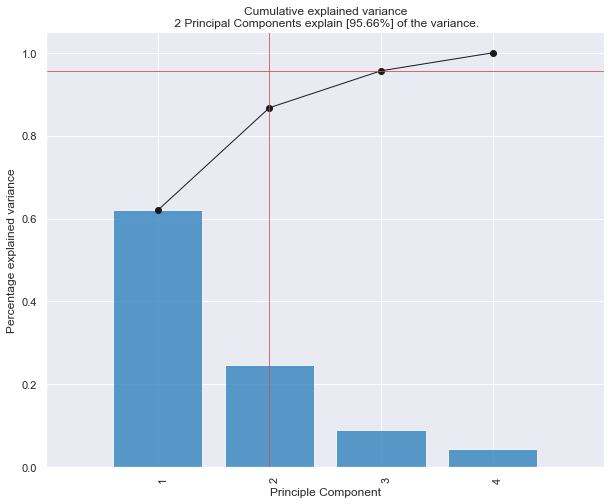

<Figure size 432x288 with 0 Axes>

In [12]:
model.plot(figsize=(10,8))
plt.show()

---
## Biplot

Biplot displays both the PC scores and PC loadings. We will use the **pca.biplot_** method from the **pca** library. 

[pca] >Plot PC1 vs PC2 with loadings.


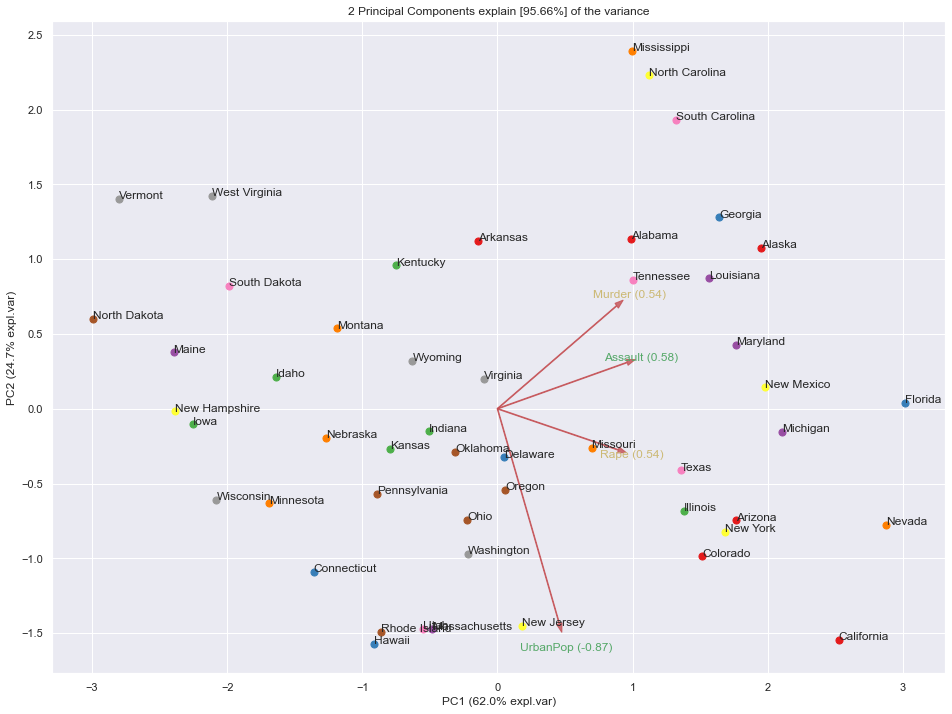

In [13]:
# The vectors are the loadings, the variables (states) are the scores
# Changing the number of features shows the the n most prevalent features.
model.biplot(n_feat=4,  legend=False, figsize=(16,12), y=states , label=True)
plt.show()

--- 
## PCA application: Wine dataset
* The dataset is called wine and it is a famous one in Machine Learning community. 
* More on wine data set: http://archive.ics.uci.edu/ml/datasets/wine

In [14]:
df = pd.read_csv('Wine.csv')

In [15]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [16]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [17]:
df.shape

(178, 14)

In [18]:
# Customer segment is from who the wine comes, we'll ignore it for now.
# They are likely to form different clusters
X=df.drop('Customer_Segment', axis=1)
labels = df.Customer_Segment

In [19]:
# model=pca(n_components=13, normalize=True) 
model=pca(n_components=0.9, normalize=True) 

In [20]:
results = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed to capture [90.0%] explained variance using the [13] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [8] that covers the [90.00%] explained variance.
[pca] >The PCA reduction is performed on the [13] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


In [21]:
# results

In [22]:
loadings=results['loadings']
loadings

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
PC3,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
PC4,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
PC5,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
PC6,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
PC7,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
PC8,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023


In [23]:
scores=results['PC']
scores['lables']=labels
scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,lables
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,1


In [24]:
# Cumulutive explained variance for each PC
results['explained_var']

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

---
## Scree plot

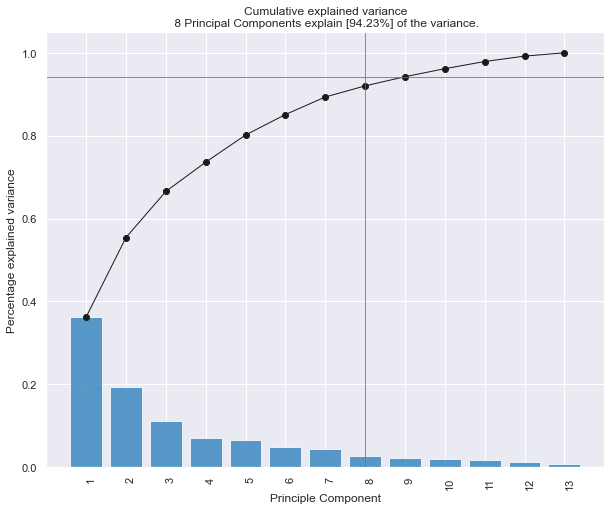

<Figure size 432x288 with 0 Axes>

In [25]:
model.plot(figsize=(10,8))
plt.show()

---
## Biplot

Biplot displays both the PC scores and PC loadings. We will use the **pca.biplot_** method from the **pca** library. 

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'8 Principal Components explain [94.23%] of the variance'}, xlabel='PC1 (36.1% expl.var)', ylabel='PC2 (19.2% expl.var)'>)

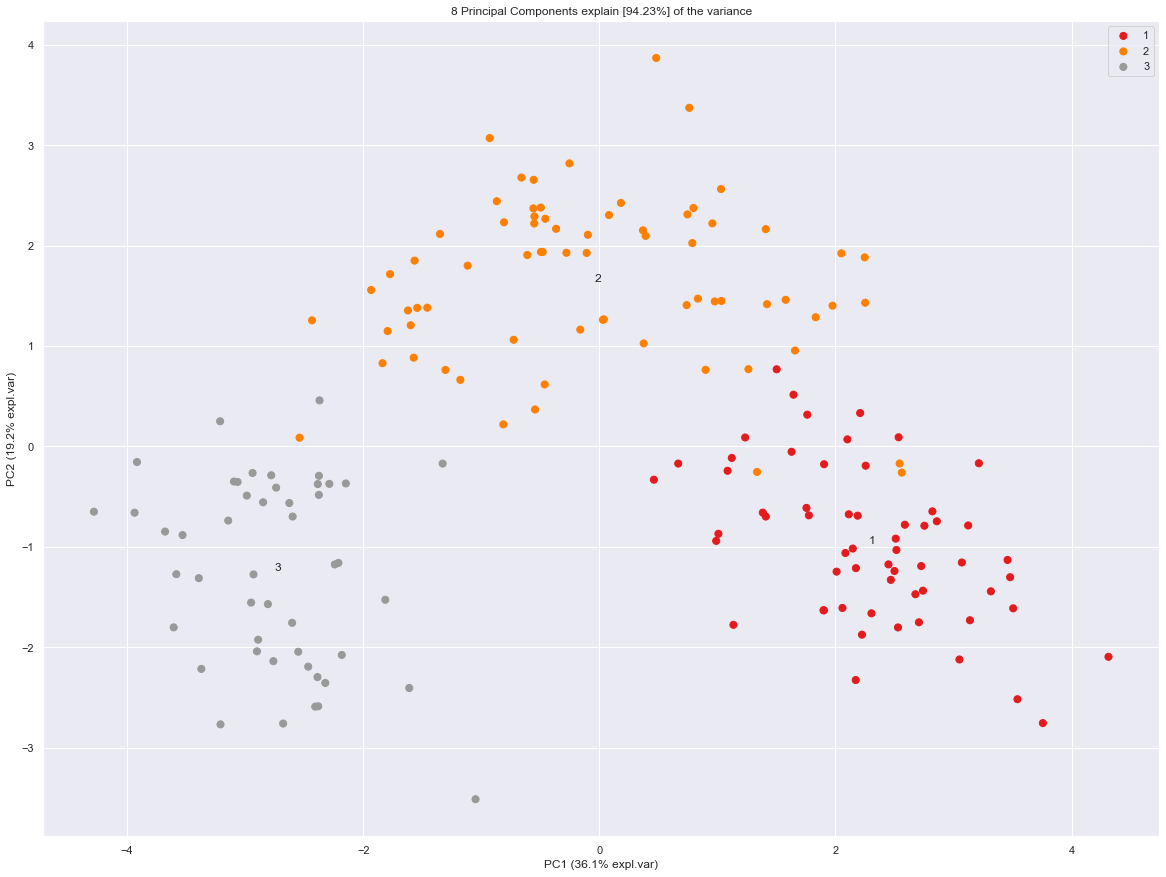

In [26]:
model.scatter(legend=True, label=True, y=labels)

[pca] >Plot PC1 vs PC2 with loadings.


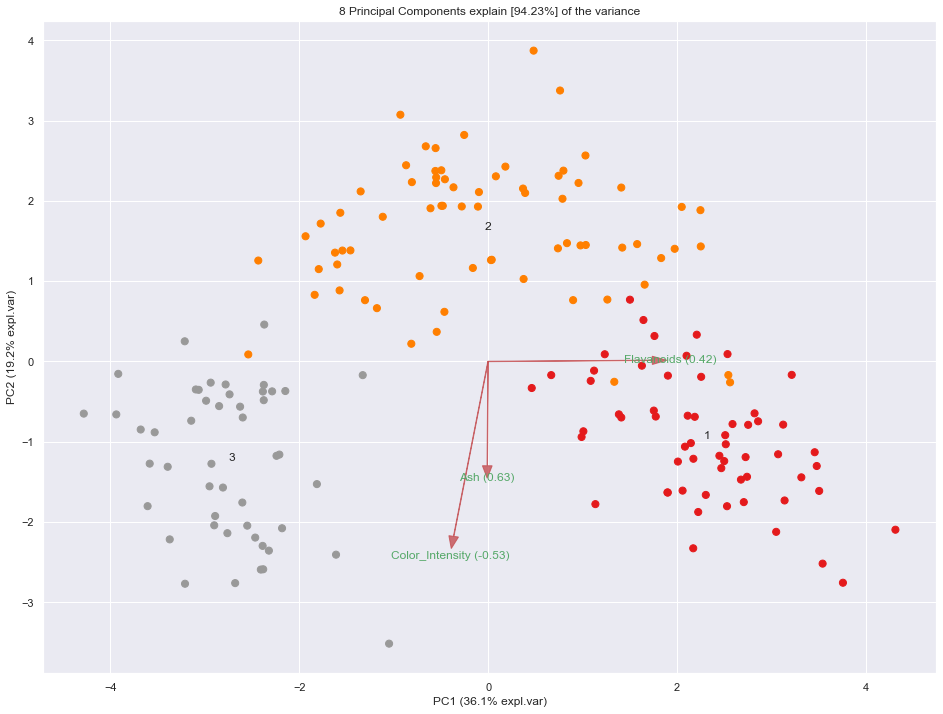

In [27]:
model.biplot(n_feat=3,  legend=False, figsize=(16,12), y=labels , label=True)
plt.show()

###  Additional links:
1. pca Python package documentation: https://pypi.org/project/pca/
2. PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
3. PCA visualization: https://setosa.io/ev/principal-component-analysis/
4. Kernel PCA sklearn documentation: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA
5. Kernel PCA visualization: https://scikit-learn.org/stable/auto_examples/decomposition/plot_kernel_pca.html#sphx-glr-auto-examples-decomposition-plot-kernel-pca-py
6. What is Singular Value Decomposition (SVD): https://www.youtube.com/watch?v=mBcLRGuAFUk